In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.metrics import classification_report
import os 
import time
from datetime import date as dt
import sys
from sklearn.preprocessing import MinMaxScaler
# Visual the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from pytz import timezone
from sqlalchemy import Table, Column, Integer, String, DateTime

# DEFINE FUNCTION FOR SQLITE

In [2]:
import sqlite3

# Create Database
def create_sqlite_database(db_name):
    conn = sqlite3.connect(db_name)
    conn.close()
    print(f"SQLite database '{db_name}' created successfully.")

# import dataframe into table
def import_dataframe_into_db(df, db_name, table_name, ): #dict_type:dict
    conn = sqlite3.connect(db_name)
    df.to_sql(table_name, conn, index=False, if_exists='replace')
              #dtype=dict_type)
    conn.close()
    print(f"DataFrame exported to table '{table_name}' in '{db_name}' successfully.")

# Export table into dataframe
def export_table_to_dataframe(db_name, table_name):
    conn = sqlite3.connect(db_name)
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# list all table in database
def list_tables_in_database(db_name):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Query the "sqlite_master" table to get all table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    table_names = cursor.fetchall()

    # Extract the table names from the result
    table_names = [table[0] for table in table_names]

    conn.close()

    if table_names:
        print("Tables in the database:")
        return table_names
    else:
        return "No tables found in the database."
        

# Drop Table 
def drop_table_in_database(db_name, table_name):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Drop the table
    query = f"DROP TABLE IF EXISTS {table_name};"
    cursor.execute(query)

    conn.commit()
    conn.close()
    print(f"Table '{table_name}' dropped successfully.")

# Create database

In [3]:
# Step 1: Create the SQLite database
database_name = "C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db"
#create_sqlite_database(database_name)

In [4]:
list_tables_in_database(database_name)

Tables in the database:


['home_performance',
 'nation_tb',
 'fifa_rank_tb',
 'preprocess_match_tb',
 'league_tb',
 'round_tb',
 'year_start_tb',
 'league_weight_tb',
 'clean_match_table',
 'team_performance',
 'elo_rank_tb']

In [5]:
#export_table_to_dataframe(database_name,'league_tb')

In [6]:
#drop_table_in_database(db_name=database_name,table_name= 'league_tb')

# Export file

In [7]:
path = 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data'
path

'C:/Users/user2/PycharmProjects/selenium_scraping_match/data'

In [8]:
pwd

'C:\\Users\\user2\\Desktop\\Tri Le\\Women_WC'

In [9]:
data_list = [os.path.join(path,file) for file in os.listdir(path) if os.path.splitext(file)[-1] == '.csv']
data_list

["C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\2019 FIFA Women's World Cup_detail_match.csv",
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\2021 Friendlies (W)_detail_match.csv',
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\2022 Friendlies (W)_detail_match.csv',
 "C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\AFC Women's Asian Cup qualification_detail_match.csv",
 "C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\AFC Women's Asian Cup_detail_match.csv",
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\Africa Women Cup of Nations_detail_match.csv',
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\Algarve Cup_detail_match.csv',
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\CONCACAF W Championship_detail_match.csv',
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\Copa América Femenina_detail_match.csv',
 "C:/Users/user2/PycharmProjects/selenium_scraping

# Combine data frame

In [10]:
dfs = [pd.read_csv(filepath_or_buffer=f,parse_dates=['Date']) for f in data_list]

In [11]:
full_df = pd.concat(dfs,ignore_index=True).sort_values(by='Date').reset_index(drop=True)
full_df

,Tournament,Round,Day,Date,Time,Home,Away,score_home,score_away,pen_home,pen_away,result,pen_result,Venue
0,2019 FIFA Women's World Cup,Group stage,Fri,2019-06-07 21:00:00,21:00,France,Korea Rep,4,0,0,0,H,0,Parc des Princes
1,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 15:00:00,15:00,Germany,China PR,1,0,0,0,H,0,Roazhon Park
2,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 18:00:00,18:00,Spain,South Africa,3,1,0,0,H,0,Stade Océane
3,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 21:00:00,21:00,Norway,Nigeria,3,0,0,0,H,0,Stade Auguste-Delaune II
4,2019 FIFA Women's World Cup,Group stage,Sun,2019-06-09 13:00:00,13:00,Australia,Italy,1,2,0,0,A,0,Stade du Hainaut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,FIFA Women's World Cup,Quarter-finals,Fri,2023-08-11 19:30:00,19:30,Japan,Sweden,1,2,0,0,A,0,Eden Park (Neutral Site)
1452,FIFA Women's World Cup,Quarter-finals,Sat,2023-08-12 17:00:00,17:00,Australia,France,0,0,7,6,D,H,Suncorp Stadium (Neutral Site)
1453,FIFA Women's World Cup,Quarter-finals,Sat,2023-08-12 20:30:00,20:30,England,Colombia,2,1,0,0,H,0,Accor Stadium (Neutral Site)
1454,FIFA Women's World Cup,Semi-finals,Tue,2023-08-15 20:00:00,20:00,Spain,Sweden,2,1,0,0,H,0,Eden Park (Neutral Site)


- Update team name

In [12]:
full_df[['Home','Away']] = full_df[['Home','Away']].replace({'Korea Republic':'Korea Rep',
                           'Equatorial Guinea':'Equ. Guinea',
                           'Republic of Ireland':'Rep. of Ireland',
                           'Hong Kong, China':'Hong Kong',
                          "Bosnia and Herzegovina":"Bosnia & Herz'na",
                           'Czechia':'Czech Republic',
                           'Papua New Guinea':'Papua NG',
                           'Antigua and Barbuda':'Antigua',
                           'Cabo Verde': 'Cape Verde' , 
                           'Dominican Republic':'Dominican Rep.', 
                           'The Gambia':'Gambia',
                           'North Macedonia':'N. Macedonia',
                           'St Kitts and Nevis':'St. Kitts & Nevis',
                           'St Lucia':'St. Lucia',
                           'South Sudan':'Sudan',
                           'Trinidad and Tobago':'Trin & Tobago',
                           'United Arab Emirates':'UAE'
                          })

- Extract Year

In [13]:
full_df['Year'] = full_df.Date.dt.year

In [14]:
# transform the tournament
# full_df['Tournament'] = full_df['Tournament'].str.replace(pat='^\d+\s',repl='',regex=True).str.strip()

In [15]:
full_df['Year'].value_counts()

Year
2022    493
2021    478
2023    245
2019    138
2020    102
Name: count, dtype: int64

In [16]:
full_df.groupby('Tournament')['Year'].min()

Tournament
2019 FIFA Women's World Cup            2019
2021 Friendlies (W)                    2021
2022 Friendlies (W)                    2022
AFC Women's Asian Cup                  2022
AFC Women's Asian Cup qualification    2021
Africa Women Cup of Nations            2022
Algarve Cup                            2022
CONCACAF W Championship                2022
Copa América Femenina                  2022
FIFA Women's World Cup                 2023
Friendlies (W)                         2023
SheBelieves Cup                        2023
UEFA Women's Euro                      2022
UEFA Women's Euro Qualification        2019
WCQ — CONCACAF (M)                     2021
WCQ — UEFA (W)                         2021
Name: Year, dtype: int32

In [17]:
full_df['tour_start'] = full_df.groupby('Tournament')['Year'].transform('min')

In [18]:
full_df

,Tournament,Round,Day,Date,Time,Home,Away,score_home,score_away,pen_home,pen_away,result,pen_result,Venue,Year,tour_start
0,2019 FIFA Women's World Cup,Group stage,Fri,2019-06-07 21:00:00,21:00,France,Korea Rep,4,0,0,0,H,0,Parc des Princes,2019,2019
1,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 15:00:00,15:00,Germany,China PR,1,0,0,0,H,0,Roazhon Park,2019,2019
2,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 18:00:00,18:00,Spain,South Africa,3,1,0,0,H,0,Stade Océane,2019,2019
3,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 21:00:00,21:00,Norway,Nigeria,3,0,0,0,H,0,Stade Auguste-Delaune II,2019,2019
4,2019 FIFA Women's World Cup,Group stage,Sun,2019-06-09 13:00:00,13:00,Australia,Italy,1,2,0,0,A,0,Stade du Hainaut,2019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,FIFA Women's World Cup,Quarter-finals,Fri,2023-08-11 19:30:00,19:30,Japan,Sweden,1,2,0,0,A,0,Eden Park (Neutral Site),2023,2023
1452,FIFA Women's World Cup,Quarter-finals,Sat,2023-08-12 17:00:00,17:00,Australia,France,0,0,7,6,D,H,Suncorp Stadium (Neutral Site),2023,2023
1453,FIFA Women's World Cup,Quarter-finals,Sat,2023-08-12 20:30:00,20:30,England,Colombia,2,1,0,0,H,0,Accor Stadium (Neutral Site),2023,2023
1454,FIFA Women's World Cup,Semi-finals,Tue,2023-08-15 20:00:00,20:00,Spain,Sweden,2,1,0,0,H,0,Eden Park (Neutral Site),2023,2023


# define table for database

## League table

In [19]:
tour_round_table = full_df.groupby(['tour_start','Tournament','Round'],as_index=False).agg({'Home':'count'}).iloc[:,[0,1,2]]
tour_round_table['league_name'] =  tour_round_table['Tournament'].str.extract(pat=r'(\d*)(.+)',expand=True)[1].str.strip()
tour_round_table

,tour_start,Tournament,Round,league_name
0,2019,2019 FIFA Women's World Cup,Final,FIFA Women's World Cup
1,2019,2019 FIFA Women's World Cup,Group stage,FIFA Women's World Cup
2,2019,2019 FIFA Women's World Cup,Quarter-finals,FIFA Women's World Cup
3,2019,2019 FIFA Women's World Cup,Round of 16,FIFA Women's World Cup
4,2019,2019 FIFA Women's World Cup,Semi-finals,FIFA Women's World Cup
5,2019,2019 FIFA Women's World Cup,Third-place match,FIFA Women's World Cup
6,2019,UEFA Women's Euro Qualification,Play-offs,UEFA Women's Euro Qualification
7,2019,UEFA Women's Euro Qualification,Qualifying stage,UEFA Women's Euro Qualification
8,2021,2021 Friendlies (W),not_available,Friendlies (W)
9,2021,AFC Women's Asian Cup qualification,not_available,AFC Women's Asian Cup qualification


### League name table: 

In [20]:
tz = timezone('Asia/Ho_Chi_Minh')

In [21]:
league_df = tour_round_table['Tournament'].str.extract(pat=r'(\d*)(.+)',expand=True)[1].str.strip().drop_duplicates().sort_values().reset_index(drop=True).to_frame().rename(columns={1:'league_name'})

# define weight
weight_league = {
'Friendlies (W)': 20,
'SheBelieves Cup': 20, 
'Algarve Cup': 20,
"AFC Women's Asian Cup qualification": 25,
'WCQ — CONCACAF (M)': 25,
"AFC Women's Asian Cup": 30,
'Africa Women Cup of Nations': 30,
'CONCACAF W Championship': 35,
'Copa América Femenina':35,
"UEFA Women's Euro Qualification": 30,
'WCQ — UEFA (W)': 40,
"UEFA Women's Euro": 45,
"FIFA Women's World Cup": 50,
}
weight_df = pd.DataFrame(weight_league.items(),columns=['league_name','league_weight'])

# combine weight with league weight
league_df =( pd.merge(left=league_df,right=weight_df,on='league_name')
            .sort_values(by='league_weight')
            .reset_index(drop=True)
            .reset_index()
            .rename(columns={'index':'league_id'}))

league_df['updated_date'] = pd.Timestamp.now(tz)

league_df

,league_id,league_name,league_weight,updated_date
0,0,Algarve Cup,20,2023-08-28 08:55:45.430830+07:00
1,1,Friendlies (W),20,2023-08-28 08:55:45.430830+07:00
2,2,SheBelieves Cup,20,2023-08-28 08:55:45.430830+07:00
3,3,AFC Women's Asian Cup qualification,25,2023-08-28 08:55:45.430830+07:00
4,4,WCQ — CONCACAF (M),25,2023-08-28 08:55:45.430830+07:00
5,5,AFC Women's Asian Cup,30,2023-08-28 08:55:45.430830+07:00
6,6,Africa Women Cup of Nations,30,2023-08-28 08:55:45.430830+07:00
7,7,UEFA Women's Euro Qualification,30,2023-08-28 08:55:45.430830+07:00
8,8,CONCACAF W Championship,35,2023-08-28 08:55:45.430830+07:00
9,9,Copa América Femenina,35,2023-08-28 08:55:45.430830+07:00


### Round name table:

In [22]:
#pd.DataFrame(round_map.items(),columns=['round_name','round_weight'])

In [23]:
round_list = [
    ['not_available','Group stage'],
    ['Qualifying stage','Preliminary round','First round'],
    ['Classification round','Play-offs','Round of 16', 'Repechage','Second round'],
    ['Quarter-finals', 'Fifth-place match','Third round'],
    ['Semi-finals'],
    ['Final'],
    ['Third-place match']
    ]
round_map = {r:(i) for i, rounds in enumerate(round_list) for r in rounds}
round_df = pd.DataFrame(round_map.items(),columns=['round_name','round_id']).reset_index().rename(columns={'index':'id'})
round_df['round_weight'] = round_df['round_id']*2
round_df['round_weight'] = round_df['round_weight'].apply(lambda x: 2 if x<2 else 9 if x>10 else x)
round_df['updated_date'] = pd.Timestamp.now(tz)
round_df

,id,round_name,round_id,round_weight,updated_date
0,0,not_available,0,2,2023-08-28 08:55:45.482826+07:00
1,1,Group stage,0,2,2023-08-28 08:55:45.482826+07:00
2,2,Qualifying stage,1,2,2023-08-28 08:55:45.482826+07:00
3,3,Preliminary round,1,2,2023-08-28 08:55:45.482826+07:00
4,4,First round,1,2,2023-08-28 08:55:45.482826+07:00
5,5,Classification round,2,4,2023-08-28 08:55:45.482826+07:00
6,6,Play-offs,2,4,2023-08-28 08:55:45.482826+07:00
7,7,Round of 16,2,4,2023-08-28 08:55:45.482826+07:00
8,8,Repechage,2,4,2023-08-28 08:55:45.482826+07:00
9,9,Second round,2,4,2023-08-28 08:55:45.482826+07:00


### Year league:

In [24]:
league_start_table = tour_round_table['tour_start'].drop_duplicates().sort_values().to_frame().reset_index(drop=True).reset_index().rename(columns={'index':'year_league_id'})
league_start_table['year_weight'] = (league_start_table['year_league_id'])*4
league_start_table['updated_date'] = pd.Timestamp.now(tz)
league_start_table

,year_league_id,tour_start,year_weight,updated_date
0,0,2019,0,2023-08-28 08:55:45.513827+07:00
1,1,2021,4,2023-08-28 08:55:45.513827+07:00
2,2,2022,8,2023-08-28 08:55:45.513827+07:00
3,3,2023,12,2023-08-28 08:55:45.513827+07:00


### League_weight_table

In [25]:
leauge_weight_table = pd.merge(left=tour_round_table,right=league_df,on='league_name',how='left')
leauge_weight_table = pd.merge(left=leauge_weight_table,right=round_df,left_on='Round',right_on='round_name',how='left').drop(columns='Round')
leauge_weight_table = pd.merge(left=leauge_weight_table,right=league_start_table,on='tour_start',how='left')
target_col = ['year_league_id','league_id','round_id','tour_start', 'Tournament', 'league_name', 'round_name', 'year_weight', 'league_weight', 'round_weight']
leauge_weight_table = leauge_weight_table[target_col].sort_values(by=['year_league_id','league_id','round_id']).reset_index(drop=True)
leauge_weight_table['total_weight'] = leauge_weight_table[['league_weight', 'year_weight', 'round_weight']].sum(axis=1)
leauge_weight_table['updated_date'] = pd.Timestamp.now(tz)
leauge_weight_table

,year_league_id,league_id,round_id,tour_start,Tournament,league_name,round_name,year_weight,league_weight,round_weight,total_weight,updated_date
0,0,7,1,2019,UEFA Women's Euro Qualification,UEFA Women's Euro Qualification,Qualifying stage,0,30,2,32,2023-08-28 08:55:45.637826+07:00
1,0,7,2,2019,UEFA Women's Euro Qualification,UEFA Women's Euro Qualification,Play-offs,0,30,4,34,2023-08-28 08:55:45.637826+07:00
2,0,12,0,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Group stage,0,50,2,52,2023-08-28 08:55:45.637826+07:00
3,0,12,2,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Round of 16,0,50,4,54,2023-08-28 08:55:45.637826+07:00
4,0,12,3,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Quarter-finals,0,50,6,56,2023-08-28 08:55:45.637826+07:00
5,0,12,4,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Semi-finals,0,50,8,58,2023-08-28 08:55:45.637826+07:00
6,0,12,5,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Final,0,50,10,60,2023-08-28 08:55:45.637826+07:00
7,0,12,6,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Third-place match,0,50,9,59,2023-08-28 08:55:45.637826+07:00
8,1,1,0,2021,2021 Friendlies (W),Friendlies (W),not_available,4,20,2,26,2023-08-28 08:55:45.637826+07:00
9,1,3,0,2021,AFC Women's Asian Cup qualification,AFC Women's Asian Cup qualification,not_available,4,25,2,31,2023-08-28 08:55:45.637826+07:00


## Nation table

In [26]:
nation_list = list(pd.concat([full_df['Home'],full_df['Away']]).sort_values().unique())
len(nation_list)

174

In [27]:
nation_dict = {i:v for i, v in enumerate(nation_list)}
nation_df = pd.DataFrame(data=(list(nation_dict.items())),columns=['id','nation'])
nation_df['updated_date'] = pd.Timestamp.now(tz)
nation_df.head()

,id,nation,updated_date
0,0,Albania,2023-08-28 08:55:45.696826+07:00
1,1,Algeria,2023-08-28 08:55:45.696826+07:00
2,2,Andorra,2023-08-28 08:55:45.696826+07:00
3,3,Angola,2023-08-28 08:55:45.696826+07:00
4,4,Anguilla,2023-08-28 08:55:45.696826+07:00


## Fifa rank

In [28]:
fifa_rank = pd.read_csv('data/rank_2023.csv',encoding='latin1')
fifa_rank['updated_date'] = pd.Timestamp.now(tz)
fifa_rank

,RK,Team,Total Points,Previous Points,+/-,updated_date
0,1,USA,2090.03,2091.38,-1.35,2023-08-28 08:55:45.757826+07:00
1,2,Germany,2061.56,2068.12,-6.56,2023-08-28 08:55:45.757826+07:00
2,3,Sweden,2049.71,2064.67,-14.96,2023-08-28 08:55:45.757826+07:00
3,4,England,2040.76,2055.82,-15.06,2023-08-28 08:55:45.757826+07:00
4,5,France,2026.65,2021.02,5.63,2023-08-28 08:55:45.757826+07:00
...,...,...,...,...,...,...
75,76,Tunisia,1298.60,1298.60,0.00,2023-08-28 08:55:45.757826+07:00
76,77,Zambia,1298.31,1297.89,0.42,2023-08-28 08:55:45.757826+07:00
77,78,"Hong Kong, China",1297.87,1296.03,1.84,2023-08-28 08:55:45.757826+07:00
78,79,Azerbaijan,1290.24,1296.27,-6.03,2023-08-28 08:55:45.757826+07:00


# Import DF into Database 

## league tables

- league name table

In [29]:
# league_df.dtypes.to_dict()
# league_data_types = {
# 'league_id': Integer,
#  'league_name':String,
#  'league_weight': Integer,
#  'updated_date': DateTime
# }

In [30]:
# Import  DataFrame to SQLite table
table_name = "league_tb"

import_dataframe_into_db(league_df, database_name, table_name)

DataFrame exported to table 'league_tb' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


In [31]:
# Import  DataFrame to SQLite table
table_name = "round_tb"
import_dataframe_into_db(round_df, database_name, table_name)

DataFrame exported to table 'round_tb' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


In [32]:
# Import  DataFrame to SQLite table
table_name = "year_start_tb"
import_dataframe_into_db(league_start_table, database_name, table_name)

DataFrame exported to table 'year_start_tb' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


In [33]:
# Import  DataFrame to SQLite table
table_name = "league_weight_tb"
import_dataframe_into_db(leauge_weight_table, database_name, table_name)

DataFrame exported to table 'league_weight_tb' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


In [34]:
table_name = "league_weight_tb"
league_weight_tb = export_table_to_dataframe(db_name=database_name,table_name=table_name)
league_weight_tb.head()

,year_league_id,league_id,round_id,tour_start,Tournament,league_name,round_name,year_weight,league_weight,round_weight,total_weight,updated_date
0,0,7,1,2019,UEFA Women's Euro Qualification,UEFA Women's Euro Qualification,Qualifying stage,0,30,2,32,2023-08-28 08:55:45.637826+07:00
1,0,7,2,2019,UEFA Women's Euro Qualification,UEFA Women's Euro Qualification,Play-offs,0,30,4,34,2023-08-28 08:55:45.637826+07:00
2,0,12,0,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Group stage,0,50,2,52,2023-08-28 08:55:45.637826+07:00
3,0,12,2,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Round of 16,0,50,4,54,2023-08-28 08:55:45.637826+07:00
4,0,12,3,2019,2019 FIFA Women's World Cup,FIFA Women's World Cup,Quarter-finals,0,50,6,56,2023-08-28 08:55:45.637826+07:00


In [35]:
#league_weight_tb.info()

In [36]:
league_weight_tb.to_csv('data/database/league_weight.csv',index=False)

## nation table

In [37]:
table_name = "nation_tb"
import_dataframe_into_db(df = nation_df, db_name=database_name, table_name=table_name)

DataFrame exported to table 'nation_tb' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


In [38]:
table_name = "nation_tb"
nation_tb = export_table_to_dataframe(db_name=database_name,table_name=table_name)
nation_tb.head()

,id,nation,updated_date
0,0,Albania,2023-08-28 08:55:45.696826+07:00
1,1,Algeria,2023-08-28 08:55:45.696826+07:00
2,2,Andorra,2023-08-28 08:55:45.696826+07:00
3,3,Angola,2023-08-28 08:55:45.696826+07:00
4,4,Anguilla,2023-08-28 08:55:45.696826+07:00


In [39]:
nation_tb.to_csv('data/database/nation_tb.csv',index=False)

## FIFA rank table

- [Reference from FIFA women rank of 9 Jun 2023](https://www.fifa.com/fifa-world-ranking/women?dateId=ranking_20230609)

In [40]:
fifa_df = pd.read_csv('data/database/fifa_rank_tb.csv',)
fifa_df['updated_date'] = pd.Timestamp.now(tz)
fifa_df.head()

,RK,team,team_short,total_point,updated_date
0,1,USA,USA,2090.03,2023-08-28 08:55:46.189827+07:00
1,2,Germany,GER,2061.56,2023-08-28 08:55:46.189827+07:00
2,3,Sweden,SWE,2049.71,2023-08-28 08:55:46.189827+07:00
3,4,England,ENG,2040.76,2023-08-28 08:55:46.189827+07:00
4,5,France,FRA,2026.65,2023-08-28 08:55:46.189827+07:00


In [41]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   RK            188 non-null    int64                           
 1   team          188 non-null    object                          
 2   team_short    188 non-null    object                          
 3   total_point   188 non-null    float64                         
 4   updated_date  188 non-null    datetime64[ns, Asia/Ho_Chi_Minh]
dtypes: datetime64[ns, Asia/Ho_Chi_Minh](1), float64(1), int64(1), object(2)
memory usage: 7.5+ KB


In [42]:
table_name = "fifa_rank_tb"
import_dataframe_into_db(df = fifa_df, 
                         db_name=database_name, 
                         table_name=table_name)

DataFrame exported to table 'fifa_rank_tb' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


In [43]:
fifa_tb = export_table_to_dataframe(db_name=database_name,table_name=table_name)
fifa_tb.head()

,RK,team,team_short,total_point,updated_date
0,1,USA,USA,2090.03,2023-08-28 08:55:46.189827+07:00
1,2,Germany,GER,2061.56,2023-08-28 08:55:46.189827+07:00
2,3,Sweden,SWE,2049.71,2023-08-28 08:55:46.189827+07:00
3,4,England,ENG,2040.76,2023-08-28 08:55:46.189827+07:00
4,5,France,FRA,2026.65,2023-08-28 08:55:46.189827+07:00


# List tables 

In [44]:
list_tables_in_database(db_name=database_name)

Tables in the database:


['home_performance',
 'preprocess_match_tb',
 'clean_match_table',
 'team_performance',
 'elo_rank_tb',
 'league_tb',
 'round_tb',
 'year_start_tb',
 'league_weight_tb',
 'nation_tb',
 'fifa_rank_tb']

# Define Match table

In [45]:
full_df = full_df.rename(columns={'Round':'round_name'})
full_df['Date'] = pd.to_datetime(full_df['Date'].dt.date)
target_col = ['Date','tour_start','Tournament', 'round_name', 'Home', 'Away','score_home', 'score_away', 'pen_home', 'pen_away', 'result','pen_result']
full_df[target_col]

,Date,tour_start,Tournament,round_name,Home,Away,score_home,score_away,pen_home,pen_away,result,pen_result
0,2019-06-07,2019,2019 FIFA Women's World Cup,Group stage,France,Korea Rep,4,0,0,0,H,0
1,2019-06-08,2019,2019 FIFA Women's World Cup,Group stage,Germany,China PR,1,0,0,0,H,0
2,2019-06-08,2019,2019 FIFA Women's World Cup,Group stage,Spain,South Africa,3,1,0,0,H,0
3,2019-06-08,2019,2019 FIFA Women's World Cup,Group stage,Norway,Nigeria,3,0,0,0,H,0
4,2019-06-09,2019,2019 FIFA Women's World Cup,Group stage,Australia,Italy,1,2,0,0,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2023-08-11,2023,FIFA Women's World Cup,Quarter-finals,Japan,Sweden,1,2,0,0,A,0
1452,2023-08-12,2023,FIFA Women's World Cup,Quarter-finals,Australia,France,0,0,7,6,D,H
1453,2023-08-12,2023,FIFA Women's World Cup,Quarter-finals,England,Colombia,2,1,0,0,H,0
1454,2023-08-15,2023,FIFA Women's World Cup,Semi-finals,Spain,Sweden,2,1,0,0,H,0


In [46]:
merge_df = pd.merge(left=full_df,
            right=leauge_weight_table,
            on=['tour_start','Tournament','round_name'],
            how='inner')
tar_col = ['year_league_id', 'league_id', 'round_id','total_weight','Date', 'Home', 'Away', 'score_home', 'score_away', 'result', 'pen_result']
final_df = merge_df[tar_col]
final_df.head()

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,pen_result
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,0
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,0
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,0
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,0
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,0


# Define function to update ELO rank 

## Get list of national teams

## Define Function

In [47]:
elo_table = export_table_to_dataframe(db_name=database_name,table_name='elo_rank_tb')

In [48]:
#{i['Team']:i['ELO_point'] for i in elo_table[['Team','ELO_point']].to_dict(orient='records')}

In [49]:
nation_tb = export_table_to_dataframe(db_name=database_name,table_name='nation_tb')
team_dict = {i:1500 for i in nation_tb['nation'].values}
def update_ELO_point(home, away,result:str,weight):
    """
    Set a base point as 1500 for all teams, then start calculating from 1st match to last match with rule:
    ELO point of Team A: Ra
    ELO point of Team B: Rb
    """
    
    global team_dict

    # Get team point before the match
    if home in team_dict.keys() and away in team_dict.keys():
        home_point = team_dict[home] 
        away_point = team_dict[away] 
    else:
        home_point =1500
        away_point = 1500

    # Chech result to get corresponding point
    if result == 'H':
        Aa = 1
        Ab = 0
    elif result == 'A':
        Aa = 0
        Ab = 1
    else:
        Aa = 0.5
        Ab = 0.5

    # Caculate the expect point
    qa = 10**(home_point/400)
    qb =  10**(away_point/400)
    Ea = qa/(qa+qb)
    Eb = qb/(qa+qb)

    # new point of Home team and away team
    Ra_ = round(home_point + weight*(Aa-Ea),2)
    Rb_ = round(away_point + weight*(Ab-Eb),2)

    # Update team point 
    if home in team_dict.keys() and away in team_dict.keys():
        team_dict[home] = Ra_
        team_dict[away] = Rb_
    return [Ra_,Rb_]

In [50]:
final_df['point_list'] = final_df[['Home','Away','result','total_weight']].apply(lambda x: update_ELO_point(home=x['Home'], away=x['Away'], result=x['result'],weight=x['total_weight']),axis=1)

C:\Users\user2\AppData\Local\Temp\ipykernel_15228\611199529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['point_list'] = final_df[['Home','Away','result','total_weight']].apply(lambda x: update_ELO_point(home=x['Home'], away=x['Away'], result=x['result'],weight=x['total_weight']),axis=1)


In [51]:
final_df['home_point'] = final_df.point_list.apply(lambda x: x[0])
final_df['away_point'] = final_df.point_list.apply(lambda x: x[1])

C:\Users\user2\AppData\Local\Temp\ipykernel_15228\412689430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['home_point'] = final_df.point_list.apply(lambda x: x[0])
C:\Users\user2\AppData\Local\Temp\ipykernel_15228\412689430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['away_point'] = final_df.point_list.apply(lambda x: x[1])


In [52]:
final_df = final_df.drop(columns='point_list')

In [53]:
final_df

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,pen_result,home_point,away_point
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,0,1526.00,1474.00
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,0,1526.00,1474.00
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,0,1526.00,1474.00
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,0,1526.00,1474.00
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,0,1474.00,1526.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,0,1711.05,1834.66
1452,3,12,3,68,2023-08-12,Australia,France,0,0,D,H,1698.55,1809.40
1453,3,12,3,68,2023-08-12,England,Colombia,2,1,H,0,1876.03,1664.34
1454,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,0,1850.01,1797.46


## Create ELO rank table 

In [54]:
my_elo_rank = pd.DataFrame(team_dict.items(),columns=['Team','ELO_point']).sort_values(by='ELO_point',ascending=False).reset_index(drop=True)
my_elo_rank['updated_date'] = pd.Timestamp.now(tz)
my_elo_rank = my_elo_rank[['Team','ELO_point','updated_date']].reset_index().rename(columns={'index':'team_id'})
my_elo_rank

,team_id,Team,ELO_point,updated_date
0,0,England,1894.56,2023-08-28 08:56:29.635793+07:00
1,1,Spain,1850.01,2023-08-28 08:56:29.635793+07:00
2,2,USA,1837.37,2023-08-28 08:56:29.635793+07:00
3,3,France,1809.40,2023-08-28 08:56:29.635793+07:00
4,4,Sweden,1797.46,2023-08-28 08:56:29.635793+07:00
...,...,...,...,...
169,169,Bulgaria,1316.91,2023-08-28 08:56:29.635793+07:00
170,170,Latvia,1307.69,2023-08-28 08:56:29.635793+07:00
171,171,Kazakhstan,1270.64,2023-08-28 08:56:29.635793+07:00
172,172,Moldova,1260.14,2023-08-28 08:56:29.635793+07:00


In [55]:
#import_dataframe_into_db(df=my_elo_rank,db_name=database_name,table_name='elo_rank_tb')

In [56]:
list_tables_in_database(db_name=database_name)

Tables in the database:


['home_performance',
 'preprocess_match_tb',
 'clean_match_table',
 'team_performance',
 'elo_rank_tb',
 'league_tb',
 'round_tb',
 'year_start_tb',
 'league_weight_tb',
 'nation_tb',
 'fifa_rank_tb']

## merge FIFA rank vs match table

In [57]:
#fifa_tb.head()

In [58]:
# def merge_rank(rank_tb, match_tb):    
#     # add rank of Home
#     comb = pd.merge(left=match_tb,
#                     right=rank_tb,
#                     left_on='Home',
#                     right_on='team',
#                     how='left').rename(columns={'RK':'home_rank'}).drop(columns='team')

#     # add rank of Away
#     comb = pd.merge(left=comb,
#                     right=rank_tb,
#                     left_on='Away',
#                     right_on='team',
#                     how='left',suffixes=('_home', '_away')).rename(columns={'RK':'away_rank','total_point_home':'home_point','total_point_away':'away_point'}).drop(columns=['team','team_short_home','team_short_away'])
#     return comb 

In [59]:
# match_df = merge_rank(rank_tb=fifa_tb,match_tb=final_df)
# match_df.head()

In [60]:
match_df = final_df.copy()
match_df

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,pen_result,home_point,away_point
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,0,1526.00,1474.00
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,0,1526.00,1474.00
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,0,1526.00,1474.00
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,0,1526.00,1474.00
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,0,1474.00,1526.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,0,1711.05,1834.66
1452,3,12,3,68,2023-08-12,Australia,France,0,0,D,H,1698.55,1809.40
1453,3,12,3,68,2023-08-12,England,Colombia,2,1,H,0,1876.03,1664.34
1454,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,0,1850.01,1797.46


In [61]:
#match_df.isna().sum()

### Check NA value and fill with a specific value

In [62]:
#match_df[match_df.home_rank.isna()]

In [63]:
#match_df[match_df.away_rank.isna()]

In [64]:
#match_df.home_point.min()

In [65]:
#match_df.home_rank.max()

- with teams are no rank => fill it with rank 190 and point 350 (last rank and smallest point)

In [66]:
#match_df = match_df.fillna(value={'home_rank':190,'away_rank':190,'home_point':350,'away_point':350})

In [67]:
#match_df.isna().sum()

## Calculate features 

### Home and Away Performance according to weighted mean (wm)

In [68]:
match_df['home_win'] = match_df['result'].apply(lambda x: 1 if x == 'H' else 0)
match_df['away_win'] = match_df['result'].apply(lambda x: 1 if x == 'A' else 0)

In [69]:
match_df

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,pen_result,home_point,away_point,home_win,away_win
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,0,1526.00,1474.00,1,0
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,0,1526.00,1474.00,1,0
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,0,1526.00,1474.00,1,0
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,0,1526.00,1474.00,1,0
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,0,1474.00,1526.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,0,1711.05,1834.66,0,1
1452,3,12,3,68,2023-08-12,Australia,France,0,0,D,H,1698.55,1809.40,0,0
1453,3,12,3,68,2023-08-12,England,Colombia,2,1,H,0,1876.03,1664.34,1,0
1454,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,0,1850.01,1797.46,1,0


<a id='Home_perf'> </a>
#### Home Performance

In [70]:
#league_weight_tb[['year_league_id','league_id','round_id','total_weight']]

In [71]:
home_perf = match_df.groupby(['year_league_id',
                              'league_id',
                              'Home'],as_index=False).agg(played_matches=('result','count'),
                                                          win_matches = ('home_win','sum'),
                                                          weight = ('total_weight','mean'))

home_perf['win_percent'] = round(home_perf['win_matches']/home_perf['played_matches'],4)

home_perf

,year_league_id,league_id,Home,played_matches,win_matches,weight,win_percent
0,0,7,Albania,4,1,32.000000,0.2500
1,0,7,Austria,4,3,32.000000,0.7500
2,0,7,Azerbaijan,4,1,32.000000,0.2500
3,0,7,Belarus,4,1,32.000000,0.2500
4,0,7,Belgium,4,4,32.000000,1.0000
...,...,...,...,...,...,...,...
510,3,12,Sweden,3,2,64.666667,0.6667
511,3,12,Switzerland,3,0,64.666667,0.0000
512,3,12,USA,2,1,64.000000,0.5000
513,3,12,Vietnam,1,0,64.000000,0.0000


- `Notes`: Weight is calculated accrording to weight defined before

In [72]:
# Define a lambda function to compute the weighted mean:
wm = lambda x: np.average(x, weights=home_perf.loc[x.index, "weight"])

- Calcualte Home perfomance according to weight defined before

In [73]:
home_perf_squad = home_perf.groupby(['year_league_id','Home'],as_index=False).agg(home_perf_wm=("win_percent", wm),total_matches = ('played_matches','sum')).rename(columns={'Home':'Team'})
home_perf_squad 

,year_league_id,Team,home_perf_wm,total_matches
0,0,Albania,0.250000,4
1,0,Argentina,0.000000,1
2,0,Australia,0.500000,2
3,0,Austria,0.750000,4
4,0,Azerbaijan,0.250000,4
...,...,...,...,...
371,3,Uruguay,1.000000,2
372,3,Uzbekistan,1.000000,1
373,3,Vietnam,0.000000,1
374,3,Wales,1.000000,1


<a id='Away_perf'> </a>
#### Away Performance

In [74]:
away_perf = match_df.groupby(['year_league_id',
                              'league_id',
                              'Away'],as_index=False).agg(played_matches=('result','count'),win_matches = ('away_win','sum'),weight = ('total_weight','mean'))
away_perf['win_percent'] = round(away_perf['win_matches']/away_perf['played_matches'],4)
away_perf

,year_league_id,league_id,Away,played_matches,win_matches,weight,win_percent
0,0,7,Albania,4,1,32.000000,0.2500
1,0,7,Austria,4,3,32.000000,0.7500
2,0,7,Azerbaijan,4,0,32.000000,0.0000
3,0,7,Belarus,3,1,32.000000,0.3333
4,0,7,Belgium,4,3,32.000000,0.7500
...,...,...,...,...,...,...,...
542,3,12,Sweden,3,2,67.333333,0.6667
543,3,12,Switzerland,1,1,64.000000,1.0000
544,3,12,USA,2,0,65.000000,0.0000
545,3,12,Vietnam,2,0,64.000000,0.0000


In [75]:
# away_perf = match_df.groupby(['Tournament_id','round_idx','Away'],as_index=False).agg(played_matches=('result','count'),
#                                                                                       win_matches = ('away_win','sum'))
# away_perf['win_percent'] = round(away_perf['win_matches']/away_perf['played_matches'],4)
# away_perf['weight'] = away_perf['Tournament_id'] + away_perf['round_idx']
# away_perf

In [76]:
# Define a lambda function to compute the weighted mean:
wm = lambda x: np.average(x, weights=away_perf.loc[x.index, "weight"])

- Calcualte Away  perfomance according to weight defined before

In [77]:
away_perf_squad = away_perf.groupby(['year_league_id','Away'],as_index=False).agg(away_perf_wm = ("win_percent", wm),total_matches = ('played_matches','sum')).rename(columns={'Away':'Team'})
away_perf_squad 

,year_league_id,Team,away_perf_wm,total_matches
0,0,Albania,0.250000,4
1,0,Argentina,0.000000,2
2,0,Australia,0.500000,2
3,0,Austria,0.750000,4
4,0,Azerbaijan,0.000000,4
...,...,...,...,...
398,3,Uzbekistan,0.500000,2
399,3,Venezuela,0.000000,2
400,3,Vietnam,0.000000,4
401,3,Wales,0.000000,2


- Merge home performance vs away performance

In [78]:
# with team has not been played in Home or Away => fill -1 for nan value
perf_team =(pd.merge(left=home_perf_squad,right=away_perf_squad,on=['year_league_id','Team'],how='outer',suffixes=('_home', '_away'))
            .fillna(0)
            .sort_values(by=['year_league_id','total_matches_home','total_matches_away'],ascending=[True,False,False])
            .reset_index(drop=True))
perf_team['total_matches']=(perf_team['total_matches_home']+perf_team['total_matches_away'])
perf_team['year_perfomance_wm']= (perf_team['home_perf_wm']*perf_team['total_matches_home']+perf_team['away_perf_wm']*perf_team['total_matches_away'])/perf_team['total_matches']
perf_team = perf_team.drop(columns=['total_matches_home','total_matches_away','home_perf_wm','away_perf_wm'])
perf_team = perf_team[perf_team['total_matches']>1]
perf_team['updated_date'] = pd.Timestamp.now(tz)
perf_team

,year_league_id,Team,total_matches,year_perfomance_wm,updated_date
0,0,Netherlands,17.0,0.900188,2023-08-28 08:56:30.622797+07:00
1,0,Italy,15.0,0.701488,2023-08-28 08:56:30.622797+07:00
2,0,France,13.0,0.867104,2023-08-28 08:56:30.622797+07:00
3,0,Germany,13.0,0.903734,2023-08-28 08:56:30.622797+07:00
4,0,Sweden,15.0,0.769913,2023-08-28 08:56:30.622797+07:00
...,...,...,...,...,...
430,3,Liechtenstein,2.0,0.000000,2023-08-28 08:56:30.622797+07:00
431,3,St. Lucia,2.0,0.000000,2023-08-28 08:56:30.622797+07:00
432,3,Tanzania,2.0,0.000000,2023-08-28 08:56:30.622797+07:00
433,3,Ukraine,2.0,0.500000,2023-08-28 08:56:30.622797+07:00


In [79]:
table_name = 'team_performance'
import_dataframe_into_db(perf_team,database_name,table_name)

DataFrame exported to table 'team_performance' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


In [80]:
test = perf_team[perf_team['Team'] == 'Vietnam']
test

,year_league_id,Team,total_matches,year_perfomance_wm,updated_date
192,1,Vietnam,2.0,1.000000,2023-08-28 08:56:30.622797+07:00
254,2,Vietnam,8.0,0.246503,2023-08-28 08:56:30.622797+07:00
401,3,Vietnam,5.0,0.000000,2023-08-28 08:56:30.622797+07:00


In [81]:
(test['year_perfomance_wm']*test['total_matches']).sum()/(test['total_matches']).sum()

0.26480166666666666

#### Import to database

In [82]:
table_name = 'team_performance'
import_dataframe_into_db(perf_team,database_name,table_name)

DataFrame exported to table 'team_performance' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


#### Merge with match dataset

In [128]:
def calculate_perfomance_team(perf_df, team, year_id):
    fil = (perf_df['Team'] == team)&(perf_df['year_league_id'].isin([year_id,year_id-1,year_id-2]))
    perf_one_team = perf_df[fil]
    shape = perf_one_team.shape[0]
    if shape>0:
        perfomance = (perf_one_team['year_perfomance_wm']*perf_one_team['total_matches']).sum()/(perf_one_team['total_matches']).sum()
    else:
        perfomance = 0
    return perfomance

In [125]:
calculate_perfomance_team(perf_df=perf_team,team='Sweden',year_id=3)

,year_league_id,Team,total_matches,year_perfomance_wm,updated_date
84,1,Sweden,15.0,0.813112,2023-08-28 08:56:30.622797+07:00
223,2,Sweden,11.0,0.494310,2023-08-28 08:56:30.622797+07:00
338,3,Sweden,10.0,0.508289,2023-08-28 08:56:30.622797+07:00


In [86]:
match_df.head()

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,pen_result,home_point,away_point,home_win,away_win
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,0,1526.0,1474.0,1,0
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,0,1526.0,1474.0,1,0
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,0,1526.0,1474.0,1,0
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,0,1526.0,1474.0,1,0
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,0,1474.0,1526.0,0,1


In [113]:
match_df['home_perf_wm'] = match_df[['Home','year_league_id']].apply(lambda x: calculate_perfomance_team(perf_df=perf_team,
                                                                              team=x['Home'],
                                                                              year_id=x['year_league_id']), axis=1)

match_df['away_perf_wm'] =  match_df[['Away','year_league_id']].apply(lambda x: calculate_perfomance_team(perf_df=perf_team,
                                                                              team=x['Away'],
                                                                              year_id=x['year_league_id']), axis=1)

In [114]:
match_df

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,pen_result,home_point,away_point,home_win,away_win,home_perf_wm,away_perf_wm
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,0,1526.00,1474.00,1,0,0.867104,0.000000
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,0,1526.00,1474.00,1,0,0.903734,0.249975
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,0,1526.00,1474.00,1,0,0.486975,0.000000
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,0,1526.00,1474.00,1,0,0.640884,0.250000
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,0,1474.00,1526.00,0,1,0.500000,0.701488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,0,1711.05,1834.66,0,1,0.671801,0.631027
1452,3,12,3,68,2023-08-12,Australia,France,0,0,D,H,1698.55,1809.40,0,0,0.477616,0.770163
1453,3,12,3,68,2023-08-12,England,Colombia,2,1,H,0,1876.03,1664.34,1,0,0.773245,0.601913
1454,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,0,1850.01,1797.46,1,0,0.854754,0.631027


In [126]:
# match_df = pd.merge(left=match_df,right=perf_team[['Team','home_perf_wm']],left_on='Home',right_on='Team',how='left').drop(columns='Team')
# match_df = pd.merge(left=match_df,right=perf_team[['Team','away_perf_wm']],left_on='Away',right_on='Team',how='left').drop(columns='Team')

<a id='Diff_rank'> </a>
## Difference Point of FIFA rank

In [127]:
target_col = [col for col in match_df.columns if not col.startswith('pen')]
match_df_pre = match_df[target_col].drop(columns=['home_win', 'away_win'])
match_df_pre['rank_diff'] = match_df_pre['home_point']-match_df_pre['away_point']
match_df_pre

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,home_point,away_point,home_perf_wm,away_perf_wm,rank_diff
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,1526.00,1474.00,0.867104,0.000000,52.00
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,1526.00,1474.00,0.903734,0.249975,52.00
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,1526.00,1474.00,0.486975,0.000000,52.00
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,1526.00,1474.00,0.640884,0.250000,52.00
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,1474.00,1526.00,0.500000,0.701488,-52.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,1711.05,1834.66,0.671801,0.631027,-123.61
1452,3,12,3,68,2023-08-12,Australia,France,0,0,D,1698.55,1809.40,0.477616,0.770163,-110.85
1453,3,12,3,68,2023-08-12,England,Colombia,2,1,H,1876.03,1664.34,0.773245,0.601913,211.69
1454,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,1850.01,1797.46,0.854754,0.631027,52.55


<a id='Streak_score'> </a>
## Collect Streak of Home/Away team from 5 to 10 recent matches

### Define function 

In [112]:
match_df_pre.shape[0]

1456

In [113]:
def count_streak_length(team:str,date=pd.to_datetime(dt.today()), n: int = 100):
    filter = (match_df_pre['Date'] < date) & ((match_df_pre['Home'] == team)|(match_df_pre['Away'] == team))
    sort_team = match_df_pre[filter].sort_values('Date',ascending=False).head(n)
    # count how many matched before a speciffic date
    count = sort_team.shape[0]
    return count

In [114]:
def weight_avg_streak_score(team:str,
                            date=pd.to_datetime(dt.today()),
                            n: int = 10):
    '''
    Calculate the weighted average of team according to the streak of n matches
    team: team name
    date: check all matches have occured before this date
    n: Number of maches that you get

    The weight is cacualted by absolute rank differance 
    result belongs in range [-3,-1,0,1,3]
    - -3: the highest compensation (punishment)
    - -1: the normal compensation
    - 0: all matches are  draw
    - 1: the normal accomplishment
    - 3: the highest accomplishment
    '''

    # Build system to compensate the higher rank losing, otherwise, accomplish the lower rank team winning
    def streak_score(is_home:bool,diff_rank:float,result:str):  # team is home or away
        if is_home: # if team is home
            dict_score = {'H':1,'A':-1,'D':0}
            match_score = dict_score[result]
            
        else: # if team is away
            dict_score = {'H':-1,'A':1,'D':0}
            diff_rank = -diff_rank
            match_score = dict_score[result]
        
        # Calculate the streak score if strong team loses weak team => compensation. In other hand, if lose team wins  strong team => accomplishment
        if diff_rank*match_score < 0:
            if match_score ==1:
                score = (match_score+2)*abs(diff_rank)
            else:
                score = (match_score-2)*abs(diff_rank)
        else:
             score = match_score*abs(diff_rank)
    
        # Return score
        return round(score,2)

    #### Get all matches occuring before a specific date and containing this team ###
    try:
        filter = (match_df_pre['Date'] < date) & ((match_df_pre['Home'] == team)|(match_df_pre['Away'] == team))
        sort_team = match_df_pre[filter].sort_values('Date',ascending=False).head(n)
    
        # define 3 list: rank diiference list, result_list, is_home_list: whether this team is Home? if Home value is True, else False 
        diff_ls = list(sort_team['rank_diff'].values)
        result_ls = list(sort_team['result'].values) 
        is_home_ls = [True if team ==h else False for h,a in sort_team[['Home','Away']].itertuples(index=False,name=None)]
    
        # Calculate the streak score according the above values
        ls_streak_score = [streak_score(is_home=i,diff_rank=d,result=r) for i, d, r in zip(is_home_ls,diff_ls,result_ls)]
    
        # Define the weight:
        diff_abs_ls = sum([abs(round(dr,2)) for dr in diff_ls])
    
        # Return result 
        if diff_abs_ls == 0 or len(ls_streak_score) == 0:
            return np.nan
        else:
            weight_avg = sum(ls_streak_score)/diff_abs_ls
            return weight_avg
    except ZeroDivisionError:
        return np.nan
        

### Breakdown function

In [115]:
match_df_pre['rank_diff'].skew()

-0.09739352728154692

<Axes: ylabel='Frequency'>

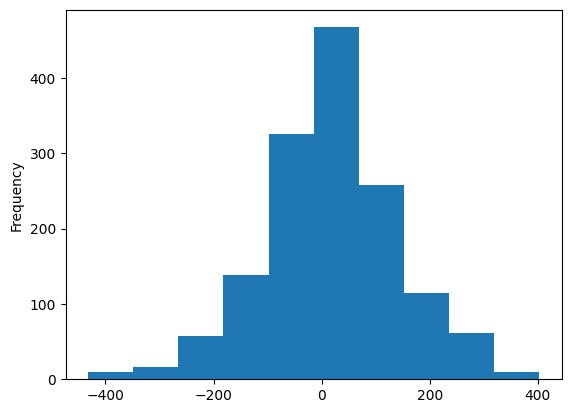

In [116]:
match_df_pre['rank_diff'].plot.hist()

In [117]:
def streak_score(is_home:bool,diff_rank:float,result:str):  # team is home or away
    if is_home: # if team is home
        dict_score = {'H':1,'A':-1,'D':0}
        match_score = dict_score[result]
        
    else: # if team is away
        dict_score = {'H':-1,'A':1,'D':0}
        diff_rank = -diff_rank
        match_score = dict_score[result]
    
    # Calculate the streak score if strong team loses weak team => compensation. In other hand, if lose team wins  strong team => accomplishment
    if diff_rank*match_score < 0:
        if match_score ==1:
            score = (match_score+2)*abs(diff_rank)
        else:
            score = (match_score-2)*abs(diff_rank)
    else:
         score = match_score*abs(diff_rank)

    # Return score
    return round(score,2)

In [118]:
team = 'South Africa'
date = '2023-08-02'
filter = (match_df_pre['Date'] < date) & ((match_df_pre['Home'] == team)|(match_df_pre['Away'] == team))
sort_team = match_df_pre[filter].sort_values('Date',ascending=False).head(10)
sort_team

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,home_point,away_point,home_perf_wm,away_perf_wm,rank_diff
1418,3,12,0,64,2023-07-28,Argentina,South Africa,2,2,D,1548.70,1506.76,0.478336,0.352632,41.94
1403,3,12,0,64,2023-07-23,Sweden,South Africa,2,1,H,1767.07,1502.07,0.673558,0.352632,265.00
1335,3,1,0,34,2023-07-02,South Africa,Botswana,0,5,A,1514.96,1440.33,0.600000,0.310345,74.63
1294,3,1,0,34,2023-04-10,Serbia,South Africa,3,2,H,1616.10,1537.60,0.760714,0.352632,78.50
1017,2,1,0,30,2022-10-08,Australia,South Africa,4,1,H,1556.80,1410.21,0.422933,0.352632,146.59
996,2,1,0,30,2022-09-05,South Africa,Brazil,0,6,A,1419.96,1550.70,0.600000,0.490158,-130.74
989,2,1,0,30,2022-09-02,South Africa,Brazil,0,3,A,1430.37,1540.29,0.600000,0.490158,-109.92
1196,2,6,5,48,2022-07-23,Morocco,South Africa,1,2,A,1566.73,1552.20,0.686750,0.352632,14.53
1187,2,6,4,46,2022-07-18,Zambia,South Africa,0,1,A,1493.34,1523.27,0.344961,0.352632,-29.93
1182,2,6,3,44,2022-07-14,South Africa,Tunisia,1,0,H,1499.04,1468.75,0.600000,0.171053,30.29


In [119]:
diff_ls = list(sort_team['rank_diff'].values)
result_ls = list(sort_team['result'].values) 
is_home_ls = [True if team ==h else False for h,a in sort_team[['Home','Away']].itertuples(index=False,name=None)]

In [120]:
ls_streak_score = [streak_score(is_home=i,diff_rank=d,result=r) for i, d, r in zip(is_home_ls,diff_ls,result_ls)]
ls_streak_score

[0.0, -265.0, -223.89, -78.5, -146.59, -130.74, -109.92, 43.59, 29.93, 30.29]

In [121]:
diff_abs_ls = [abs(round(dr,2)) for dr in diff_ls]
diff_abs_ls

[41.94, 265.0, 74.63, 78.5, 146.59, 130.74, 109.92, 14.53, 29.93, 30.29]

In [122]:
sum(ls_streak_score)/sum(diff_abs_ls)

-0.9227390545186376

### Check function

In [123]:
team = 'Benin'
date = '2023-02-19'
weight_avg_streak_score(team=team,date=date,n=10)

nan

In [124]:
count_streak_length(team=team,date=date,n=10)

0

### Apply function to dataframe 

- Home/Away streak score

In [126]:
match_df_pre['Home_streak_score'] = match_df_pre.apply(lambda x: weight_avg_streak_score(team=x['Home'],date=x['Date'],n=7),axis=1)
match_df_pre['Away_streak_score'] = match_df_pre.apply(lambda x: weight_avg_streak_score(team=x['Away'],date=x['Date'],n=7),axis=1)

In [127]:
match_df_pre

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,home_point,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,1526.00,1474.00,0.837631,0.313430,52.00,NaN,NaN
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,1526.00,1474.00,0.789104,0.270492,52.00,NaN,NaN
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,1526.00,1474.00,0.879475,0.352632,52.00,NaN,NaN
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,1526.00,1474.00,0.630072,0.343202,52.00,NaN,NaN
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,1474.00,1526.00,0.422933,0.524816,-52.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,1711.05,1834.66,0.667393,0.573549,-123.61,0.947807,0.443787
1452,3,12,3,68,2023-08-12,Australia,France,0,0,D,1698.55,1809.40,0.422933,0.459276,-110.85,2.129517,0.338649
1453,3,12,3,68,2023-08-12,England,Colombia,2,1,H,1876.03,1664.34,0.698114,0.369784,211.69,0.072104,0.496775
1454,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,1850.01,1797.46,0.879475,0.573549,52.55,0.852868,0.525918


- Length Streak 

In [128]:
match_df_pre['Home_streak_length'] = match_df_pre.apply(lambda x: count_streak_length(team=x['Home'],date=x['Date'],n=6),axis=1)
match_df_pre['Away_streak_length'] = match_df_pre.apply(lambda x: count_streak_length(team=x['Away'],date=x['Date'],n=6),axis=1)

### Caculate  correlation coefficient between streak score and Result (true label)

#### Preprocess data to tranform continous variable to categorical variable

In [129]:
filter = (match_df_pre['Home_streak_length']>=3) & (match_df_pre['Away_streak_length']>=3)

In [130]:
test = match_df_pre[filter].copy()
test['diff_streak_score'] = test['Home_streak_score']-test['Away_streak_score']

In [131]:
test['streak_result'] = test['diff_streak_score'].apply(lambda x: 'A' if x < -0.06 else ('D' if x>=- 0.06 and x<=0.06 else 'H'))

In [132]:
test

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,...,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_streak_length,Away_streak_length,diff_streak_score,streak_result
36,0,12,2,54,2019-06-22,Germany,Nigeria,3,0,H,...,1457.89,0.789104,0.343202,132.52,1.000000,-0.480727,3,3,1.480727,H
37,0,12,2,54,2019-06-22,Norway,Australia,1,1,D,...,1525.70,0.630072,0.666663,-3.26,0.480727,0.333333,3,3,0.147394,H
38,0,12,2,54,2019-06-23,England,Cameroon,3,0,H,...,1458.15,0.698114,0.192661,135.68,1.000000,-0.480727,3,3,1.480727,H
39,0,12,2,54,2019-06-23,France,Brazil,2,1,H,...,1502.72,0.837631,0.490158,94.70,1.000000,0.771056,3,3,0.228944,H
40,0,12,2,54,2019-06-24,Spain,USA,1,2,A,...,1595.46,0.879475,0.643299,-116.78,0.000000,1.000000,3,3,-1.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,...,1834.66,0.667393,0.573549,-123.61,0.947807,0.443787,6,6,0.504020,H
1452,3,12,3,68,2023-08-12,Australia,France,0,0,D,...,1809.40,0.422933,0.459276,-110.85,2.129517,0.338649,6,6,1.790868,H
1453,3,12,3,68,2023-08-12,England,Colombia,2,1,H,...,1664.34,0.698114,0.369784,211.69,0.072104,0.496775,6,6,-0.424671,A
1454,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,...,1797.46,0.879475,0.573549,52.55,0.852868,0.525918,6,6,0.326951,H


#### Apply  Cramér's V test to calculate Correlation of 2 categorical features

In [133]:
contingency_tb = pd.crosstab(test['streak_result'], test['result'])
data = contingency_tb.to_numpy()
contingency_tb

result,A,D,H
streak_result,,,
A,243,89,148
D,39,8,45
H,95,78,385


In [134]:
# Calculate the chi-squared statistic
chi2, p, dof, expected = scipy.stats.chi2_contingency(data)

# Calculate Cramér's V
n = np.sum(data)
phi = np.sqrt(chi2 / (n * (min(data.shape) - 1)))
cramers_v = phi / np.sqrt(min(data.shape) - 1)

# Print the results
print("Cramér's V:", cramers_v)

Cramér's V: 0.19381098473813602


In [135]:
# Generate the classification report
report = classification_report(y_true=test['result'],y_pred= test['streak_result'])
# Print the classification report
print(report)

              precision    recall  f1-score   support

           A       0.51      0.64      0.57       377
           D       0.09      0.05      0.06       175
           H       0.69      0.67      0.68       578

    accuracy                           0.56      1130
   macro avg       0.43      0.45      0.43      1130
weighted avg       0.54      0.56      0.55      1130



- This is a good indicator in calculating features which predict true label

<a id='Diff_goal'> </a>
## Caculate Goal Difference of Home/Away team

### Define function:

In [136]:
# Build system to compensate the higher rank losing, otherwise, accomplish the lower rank team winning
w = (match_df_pre[['rank_diff']]).to_numpy()
scaler = MinMaxScaler(feature_range=(0,10)).fit(w)
    
def GA_GF_score(is_home:bool,
                        diff_rank:float,
                        GA:float,
                        GF:float):  # team is home or away

        ##### DETERMINE THE WEIGHT HIGH OF LOW ######
        goal_diff = GF-GA
        weight_rank = 0
        # 2 cases: if diff_rank > 0 and goal diff > 0: rank of Home is higher than Away and Honme win Away. Or rank of Home < Away and Home lose Away => there is a small weight 
        if (diff_rank > 0 and goal_diff >=0) or (diff_rank < 0  and goal_diff <= 0): 
            weight_rank = float(scaler.transform(X=np.array([[-abs(diff_rank)]])).squeeze()) # use abs then add negative => get small weight
    
        # 2 cases: if diff_rank > 0 and goal diff < 0: rank of Home is higher than Away BUT Honme lose Away. Or rank of Home < Away BUT Home win Away => there is a significant weight 
        elif (diff_rank > 0 and goal_diff <0) or (diff_rank < 0  and goal_diff >0):
            weight_rank = float(scaler.transform(X=np.array([[abs(diff_rank)]])).squeeze())
    
        if not is_home: # if team is Away
            goal_diff = - goal_diff
            
        dict_score = {'goal_diff':goal_diff,
                      'weight': weight_rank,
                      'weight_goal_diff': goal_diff*weight_rank
                     }
        return dict_score

In [167]:
def weight_avg_GA_GF_score(team:str,
                        date=pd.to_datetime(dt.today()),
                        n: int = 6):
    '''
    Calculate the weighted average of team 
    Weighted average of Home team's goal difference from 3 to 6 recent matches (Applied the punish-accomplish system to adjust weight)
    The weight is calculated by the rank difference which is normalized. Params:
    - team: team name
    - date: check all matches have occured before this date
    - n: Number of maches that you get

    There are 2 cases considering a sinificant weight:
    - If diff_rank > 0 and goal diff < 0: rank of Home is higher than Away BUT Honme lose Away. 
    - Or diff_rank < 0 and goal diff > 0: rank of Home < Away BUT Home win Away
    '''
    
    try:
        # Get all matches occuring before a specific date and containing this team
        filter = (match_df_pre['Date'] < date) & ((match_df_pre['Home'] == team)|(match_df_pre['Away'] == team))
        sort_team = match_df_pre[filter].sort_values('Date',ascending=False).head(n)
    
        # define 4 list: GA list, GF list, rank_diff list, is_home_list: whether this team is Home? if Home value is True, else False 
        rank_ls = list(sort_team['rank_diff'].values)
        gf_ls = list(sort_team['score_home'].values)
        ga_ls = list(sort_team['score_away'].values)
        is_home_ls = [True if team ==h else False for h,a in sort_team[['Home','Away']].itertuples(index=False,name=None)]
    
        # Calculate the total weight score regarding to the weight 
        weight_diff_list = [GA_GF_score(is_home=i,
                            diff_rank=dr,
                            GF=gf,
                            GA=ga) for i, dr, gf, ga in zip(is_home_ls,
                                                              rank_ls,
                                                              gf_ls,
                                                              ga_ls)]
    
        # Return result 
        if sum([i['weight'] for i in weight_diff_list]) == 0:
            return np.nan
        else:
            # Define the weight:
            sum_weight_diff_rank = sum([i['weight_goal_diff'] for i in weight_diff_list])
            sum_weight = sum([i['weight'] for i in weight_diff_list])
            result = sum_weight_diff_rank/sum_weight
            return result
    except ZeroDivisionError:
        return np.nan

### Breakdown 

In [138]:
team = 'Panama'
date = '2023-08-02'
n = 10 

In [139]:
filter = (match_df_pre['Date'] < date) & ((match_df_pre['Home'] == team)|(match_df_pre['Away'] == team))
sort_team = match_df_pre[filter].sort_values('Date',ascending=False).head(n)

# define 4 list: GA list, GF list, home weight(if team is home, use it, else 10 minus it), is_home_list: whether this team is Home? if Home value is True, else False 
rank_ls = list(sort_team['rank_diff'].values)
gf_ls = list(sort_team['score_home'].values)
ga_ls = list(sort_team['score_away'].values)
is_home_ls = [True if team ==h else False for h,a in sort_team[['Home','Away']].itertuples(index=False,name=None)]

# Calculate the total weight score regarding to the weight 
weight_diff_list = [GA_GF_score(is_home=i,
                               diff_rank=dr,
                               GF=gf,
                               GA=ga) for i, dr, gf, ga in zip(is_home_ls,
                                                              rank_ls,
                                                              gf_ls,
                                                              ga_ls)]

In [140]:
sort_team

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,home_point,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_streak_length,Away_streak_length
1423,3,12,0,64,2023-07-29,Panama,Jamaica,0,1,A,1504.08,1573.85,0.578981,0.338877,-69.77,-0.310370,-0.294274,6,6
1408,3,12,0,64,2023-07-24,Brazil,Panama,4,0,H,1727.48,1535.43,0.849705,0.267654,192.05,0.623943,0.003204,6,6
1362,3,1,0,34,2023-07-14,Japan,Panama,5,0,H,1627.08,1554.05,0.667393,0.267654,73.03,-0.700728,-0.093413,6,6
1330,3,1,0,34,2023-06-29,Spain,Panama,7,0,H,1767.72,1568.95,0.879475,0.267654,198.77,0.978875,0.371584,6,6
1329,3,1,0,34,2023-06-26,Gibraltar,Panama,0,7,A,1414.80,1577.82,0.144444,0.267654,-163.02,-1.667456,0.214135,6,6
1326,3,1,0,34,2023-06-21,Colombia,Panama,1,1,D,1625.76,1567.41,0.731707,0.267654,58.35,0.373539,0.182067,6,6
1325,3,1,0,34,2023-06-17,Panama,Colombia,0,2,A,1564.29,1628.88,0.578981,0.369784,-64.59,0.493138,0.313046,6,6
1289,3,1,0,34,2023-04-09,Panama,Dominican Rep.,4,3,H,1579.64,1478.37,0.578981,0.170330,101.27,0.485846,-0.899295,6,6
1260,3,1,0,34,2023-04-06,Panama,Dominican Rep.,1,0,H,1566.23,1491.78,0.578981,0.170330,74.45,0.115554,-0.890706,6,6
1215,3,1,0,34,2023-02-05,Chile,Panama,4,0,H,1504.25,1551.41,0.381356,0.267654,-47.16,-0.021675,0.296700,6,6


In [165]:
#weight_diff_list

In [142]:
print(rank_ls)

[-69.76999999999998, 192.04999999999995, 73.02999999999997, 198.76999999999998, -163.01999999999998, 58.34999999999991, -64.59000000000015, 101.27000000000021, 74.45000000000005, -47.16000000000008]


In [143]:
float(scaler.transform(X=np.array([[79.42]])).squeeze())

6.128463898743887

In [144]:
sum_gd = sum([i['weight_goal_diff'] for i in weight_diff_list])
sum_gd

-57.87072106625756

In [145]:
sum_we = sum([i['weight'] for i in weight_diff_list])
sum_we

40.40128487870362

In [146]:
sum_gd/sum_we

-1.4323980348645409

### Check function

In [147]:
team = 'South Africa'
date = '2023-08-02'
n = 6 
weight_avg_GA_GF_score(team=team,date=date,n=n)

-2.8532747603833863

### Apply to Dataframe

**This metric will be define to 4 groups:**
- in range 0<x<1: there are draw matches on 10 matches,
- if x< 0: losing matches more than winning matches and still have draw matches,
- if x< -1 there are many losing matches.
- In contrast, if x > 1, there are many winning matches

In [148]:
match_df_pre['Home_diff_score'] = match_df_pre.apply(lambda x: weight_avg_GA_GF_score(team=x['Home'],date=x['Date'],n=6),axis=1)
match_df_pre['Away_diff_score'] = match_df_pre.apply(lambda x: weight_avg_GA_GF_score(team=x['Away'],date=x['Date'],n=6),axis=1)

In [149]:
match_df_pre

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,...,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_streak_length,Away_streak_length,Home_diff_score,Away_diff_score
0,0,12,0,52,2019-06-07,France,Korea Rep,4,0,H,...,1474.00,0.837631,0.313430,52.00,NaN,NaN,0,0,NaN,NaN
1,0,12,0,52,2019-06-08,Germany,China PR,1,0,H,...,1474.00,0.789104,0.270492,52.00,NaN,NaN,0,0,NaN,NaN
2,0,12,0,52,2019-06-08,Spain,South Africa,3,1,H,...,1474.00,0.879475,0.352632,52.00,NaN,NaN,0,0,NaN,NaN
3,0,12,0,52,2019-06-08,Norway,Nigeria,3,0,H,...,1474.00,0.630072,0.343202,52.00,NaN,NaN,0,0,NaN,NaN
4,0,12,0,52,2019-06-09,Australia,Italy,1,2,A,...,1526.00,0.422933,0.524816,-52.00,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,...,1834.66,0.667393,0.573549,-123.61,0.947807,0.443787,6,6,2.915616,0.777367
1452,3,12,3,68,2023-08-12,Australia,France,0,0,D,...,1809.40,0.422933,0.459276,-110.85,2.129517,0.338649,6,6,1.483908,0.943873
1453,3,12,3,68,2023-08-12,England,Colombia,2,1,H,...,1664.34,0.698114,0.369784,211.69,0.072104,0.496775,6,6,-0.398278,0.739392
1454,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,...,1797.46,0.879475,0.573549,52.55,0.852868,0.525918,6,6,0.628296,1.373039


In [150]:
match_df_pre.columns

Index(['year_league_id', 'league_id', 'round_id', 'total_weight', 'Date',
       'Home', 'Away', 'score_home', 'score_away', 'result', 'home_point',
       'away_point', 'home_perf_wm', 'away_perf_wm', 'rank_diff',
       'Home_streak_score', 'Away_streak_score', 'Home_streak_length',
       'Away_streak_length', 'Home_diff_score', 'Away_diff_score'],
      dtype='object')

### Correlation of streak score and diff score 

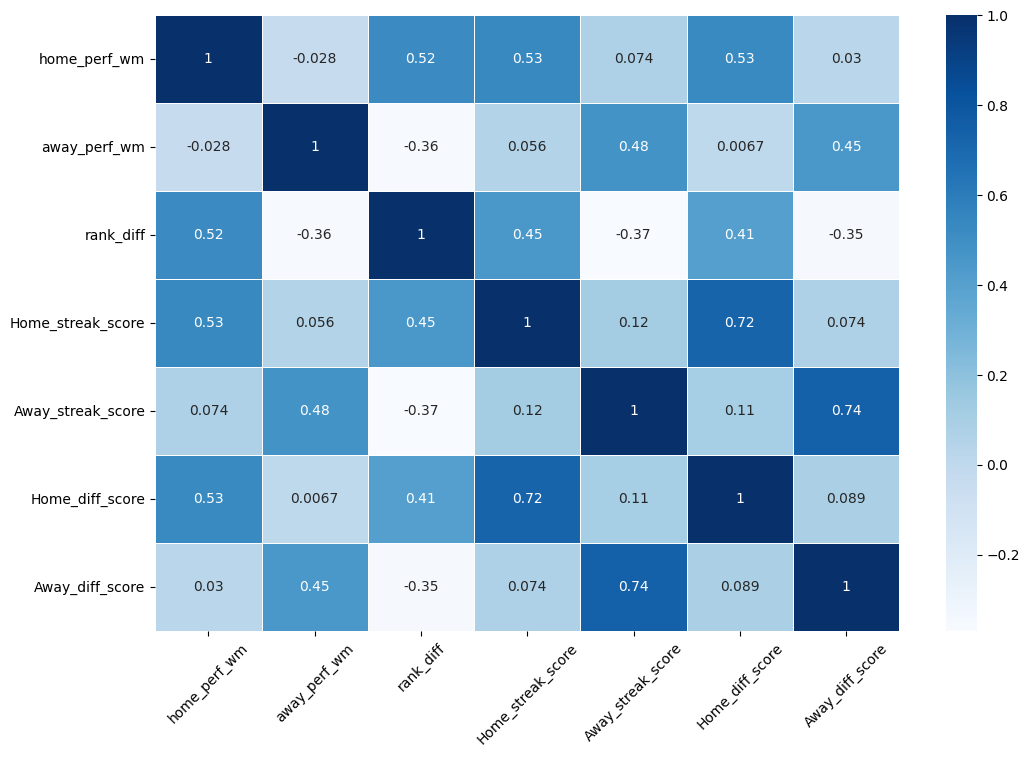

In [151]:
df = match_df_pre[['home_perf_wm','away_perf_wm','rank_diff','Home_streak_score','Away_streak_score','Home_diff_score','Away_diff_score']]
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidths=0.5,ax=ax)
ax.tick_params('x', labelrotation=45)
plt.show()

# Import match dataframe into database

In [153]:
filter = (match_df_pre['Home_streak_length']>=3) & (match_df_pre['Away_streak_length']>=3)
preprocess_match_df = match_df_pre[filter].dropna().drop(columns=['Home_streak_length','Away_streak_length']).reset_index(drop=True)
preprocess_match_df['updated_date'] = pd.Timestamp.now(tz)
preprocess_match_df

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,home_point,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,updated_date
0,0,12,2,54,2019-06-22,Germany,Nigeria,3,0,H,1590.41,1457.89,0.789104,0.343202,132.52,1.000000,-0.480727,1.830832,-0.653192,2023-08-24 11:20:00.453574+07:00
1,0,12,2,54,2019-06-22,Norway,Australia,1,1,D,1522.44,1525.70,0.630072,0.666663,-3.26,0.480727,0.333333,1.000000,0.922293,2023-08-24 11:20:00.453574+07:00
2,0,12,2,54,2019-06-23,England,Cameroon,3,0,H,1593.83,1458.15,0.698114,0.192661,135.68,1.000000,-0.480727,1.326602,-0.612768,2023-08-24 11:20:00.453574+07:00
3,0,12,2,54,2019-06-23,France,Brazil,2,1,H,1597.42,1502.72,0.837631,0.490158,94.70,1.000000,0.771056,2.040424,0.927896,2023-08-24 11:20:00.453574+07:00
4,0,12,2,54,2019-06-24,Spain,USA,1,2,A,1478.68,1595.46,0.879475,0.643299,-116.78,0.000000,1.000000,0.500000,6.121272,2023-08-24 11:20:00.453574+07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,1711.05,1834.66,0.667393,0.573549,-123.61,0.947807,0.443787,2.915616,0.777367,2023-08-24 11:20:00.453574+07:00
1126,3,12,3,68,2023-08-12,Australia,France,0,0,D,1698.55,1809.40,0.422933,0.459276,-110.85,2.129517,0.338649,1.483908,0.943873,2023-08-24 11:20:00.453574+07:00
1127,3,12,3,68,2023-08-12,England,Colombia,2,1,H,1876.03,1664.34,0.698114,0.369784,211.69,0.072104,0.496775,-0.398278,0.739392,2023-08-24 11:20:00.453574+07:00
1128,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,1850.01,1797.46,0.879475,0.573549,52.55,0.852868,0.525918,0.628296,1.373039,2023-08-24 11:20:00.453574+07:00


In [154]:
table_name = "preprocess_match_tb"
import_dataframe_into_db(df = preprocess_match_df, db_name=database_name, table_name=table_name)

DataFrame exported to table 'preprocess_match_tb' in 'C:/Users/user2/PycharmProjects/customTransformer/database/soccer_database.db' successfully.


In [155]:
list_tables_in_database(db_name=database_name)

Tables in the database:


['home_performance',
 'league_tb',
 'round_tb',
 'year_start_tb',
 'league_weight_tb',
 'nation_tb',
 'fifa_rank_tb',
 'elo_rank_tb',
 'team_performance',
 'preprocess_match_tb']

In [470]:
#drop_table_in_database(db_name=database_name,table_name='match_tb')

In [156]:
match_tb = export_table_to_dataframe(db_name=database_name,table_name=table_name)
match_tb.head()

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,home_point,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,updated_date
0,0,12,2,54,2019-06-22 00:00:00,Germany,Nigeria,3,0,H,1590.41,1457.89,0.789104,0.343202,132.52,1.000000,-0.480727,1.830832,-0.653192,2023-08-24 11:20:00.453574+07:00
1,0,12,2,54,2019-06-22 00:00:00,Norway,Australia,1,1,D,1522.44,1525.70,0.630072,0.666663,-3.26,0.480727,0.333333,1.000000,0.922293,2023-08-24 11:20:00.453574+07:00
2,0,12,2,54,2019-06-23 00:00:00,England,Cameroon,3,0,H,1593.83,1458.15,0.698114,0.192661,135.68,1.000000,-0.480727,1.326602,-0.612768,2023-08-24 11:20:00.453574+07:00
3,0,12,2,54,2019-06-23 00:00:00,France,Brazil,2,1,H,1597.42,1502.72,0.837631,0.490158,94.70,1.000000,0.771056,2.040424,0.927896,2023-08-24 11:20:00.453574+07:00
4,0,12,2,54,2019-06-24 00:00:00,Spain,USA,1,2,A,1478.68,1595.46,0.879475,0.643299,-116.78,0.000000,1.000000,0.500000,6.121272,2023-08-24 11:20:00.453574+07:00


In [157]:
match_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_league_id     1130 non-null   int64  
 1   league_id          1130 non-null   int64  
 2   round_id           1130 non-null   int64  
 3   total_weight       1130 non-null   int64  
 4   Date               1130 non-null   object 
 5   Home               1130 non-null   object 
 6   Away               1130 non-null   object 
 7   score_home         1130 non-null   int64  
 8   score_away         1130 non-null   int64  
 9   result             1130 non-null   object 
 10  home_point         1130 non-null   float64
 11  away_point         1130 non-null   float64
 12  home_perf_wm       1130 non-null   float64
 13  away_perf_wm       1130 non-null   float64
 14  rank_diff          1130 non-null   float64
 15  Home_streak_score  1130 non-null   float64
 16  Away_streak_score  1130 

In [158]:
match_tb.to_csv('data/database/match_tb.csv',index=False)

# EXTRACT FEATURES IN TRAINING PROCCESS

In [159]:
preprocess_match_df

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,home_point,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,updated_date
0,0,12,2,54,2019-06-22,Germany,Nigeria,3,0,H,1590.41,1457.89,0.789104,0.343202,132.52,1.000000,-0.480727,1.830832,-0.653192,2023-08-24 11:20:00.453574+07:00
1,0,12,2,54,2019-06-22,Norway,Australia,1,1,D,1522.44,1525.70,0.630072,0.666663,-3.26,0.480727,0.333333,1.000000,0.922293,2023-08-24 11:20:00.453574+07:00
2,0,12,2,54,2019-06-23,England,Cameroon,3,0,H,1593.83,1458.15,0.698114,0.192661,135.68,1.000000,-0.480727,1.326602,-0.612768,2023-08-24 11:20:00.453574+07:00
3,0,12,2,54,2019-06-23,France,Brazil,2,1,H,1597.42,1502.72,0.837631,0.490158,94.70,1.000000,0.771056,2.040424,0.927896,2023-08-24 11:20:00.453574+07:00
4,0,12,2,54,2019-06-24,Spain,USA,1,2,A,1478.68,1595.46,0.879475,0.643299,-116.78,0.000000,1.000000,0.500000,6.121272,2023-08-24 11:20:00.453574+07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,1711.05,1834.66,0.667393,0.573549,-123.61,0.947807,0.443787,2.915616,0.777367,2023-08-24 11:20:00.453574+07:00
1126,3,12,3,68,2023-08-12,Australia,France,0,0,D,1698.55,1809.40,0.422933,0.459276,-110.85,2.129517,0.338649,1.483908,0.943873,2023-08-24 11:20:00.453574+07:00
1127,3,12,3,68,2023-08-12,England,Colombia,2,1,H,1876.03,1664.34,0.698114,0.369784,211.69,0.072104,0.496775,-0.398278,0.739392,2023-08-24 11:20:00.453574+07:00
1128,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,1850.01,1797.46,0.879475,0.573549,52.55,0.852868,0.525918,0.628296,1.373039,2023-08-24 11:20:00.453574+07:00


In [160]:
wc_id = preprocess_match_df['league_id'].sort_values().unique()[-1]
filter_test = preprocess_match_df['league_id'] == wc_id
preprocess_match_df[filter_test]

,year_league_id,league_id,round_id,total_weight,Date,Home,Away,score_home,score_away,result,home_point,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,updated_date
0,0,12,2,54,2019-06-22,Germany,Nigeria,3,0,H,1590.41,1457.89,0.789104,0.343202,132.52,1.000000,-0.480727,1.830832,-0.653192,2023-08-24 11:20:00.453574+07:00
1,0,12,2,54,2019-06-22,Norway,Australia,1,1,D,1522.44,1525.70,0.630072,0.666663,-3.26,0.480727,0.333333,1.000000,0.922293,2023-08-24 11:20:00.453574+07:00
2,0,12,2,54,2019-06-23,England,Cameroon,3,0,H,1593.83,1458.15,0.698114,0.192661,135.68,1.000000,-0.480727,1.326602,-0.612768,2023-08-24 11:20:00.453574+07:00
3,0,12,2,54,2019-06-23,France,Brazil,2,1,H,1597.42,1502.72,0.837631,0.490158,94.70,1.000000,0.771056,2.040424,0.927896,2023-08-24 11:20:00.453574+07:00
4,0,12,2,54,2019-06-24,Spain,USA,1,2,A,1478.68,1595.46,0.879475,0.643299,-116.78,0.000000,1.000000,0.500000,6.121272,2023-08-24 11:20:00.453574+07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,3,12,3,68,2023-08-11,Japan,Sweden,1,2,A,1711.05,1834.66,0.667393,0.573549,-123.61,0.947807,0.443787,2.915616,0.777367,2023-08-24 11:20:00.453574+07:00
1126,3,12,3,68,2023-08-12,Australia,France,0,0,D,1698.55,1809.40,0.422933,0.459276,-110.85,2.129517,0.338649,1.483908,0.943873,2023-08-24 11:20:00.453574+07:00
1127,3,12,3,68,2023-08-12,England,Colombia,2,1,H,1876.03,1664.34,0.698114,0.369784,211.69,0.072104,0.496775,-0.398278,0.739392,2023-08-24 11:20:00.453574+07:00
1128,3,12,4,70,2023-08-15,Spain,Sweden,2,1,H,1850.01,1797.46,0.879475,0.573549,52.55,0.852868,0.525918,0.628296,1.373039,2023-08-24 11:20:00.453574+07:00


In [161]:
#filter = (preprocess_match_df['Home_streak_length'] >=3) & (preprocess_match_df['Away_streak_length'] >=3)

In [162]:
features_col = ['Date','Tournament_id', 'round_idx','Home', 'Away','home_perf_wm', 'away_perf_wm', 'rank_diff','Home_streak_score','Away_streak_score', 'Home_streak_length', 'Away_streak_length','Home_diff_score', 'Away_diff_score','result']
preprocess_match_df.columns

Index(['year_league_id', 'league_id', 'round_id', 'total_weight', 'Date',
       'Home', 'Away', 'score_home', 'score_away', 'result', 'home_point',
       'away_point', 'home_perf_wm', 'away_perf_wm', 'rank_diff',
       'Home_streak_score', 'Away_streak_score', 'Home_diff_score',
       'Away_diff_score', 'updated_date'],
      dtype='object')

In [163]:
preprocess_match_df.to_csv('data/database/clean_dataset.csv',index=False)

In [164]:
final_df['result'].value_counts(normalize=True)

result
H    0.513049
A    0.337225
D    0.149725
Name: proportion, dtype: float64

[helloo link to home](#Another_cell)